# Notas (Hierarchical Clustering)

Péricles S. G. Marques / Contato: https://www.linkedin.com/in/periclessavio/

### Objetivo:
Categorizar 5 alunos

##### Importação da base de dados e os primeiros passos

In [14]:
import pyreadr #biblioteca para carregar dados ".RData"
notas = pyreadr.read_r('arquivos/notas.RData') #carregar arquivo "notas.RData"
notas #chama a variável

OrderedDict([('Vestibular',
                   estudante  matematica  fisica  quimica
              0     Gabriela         3.7     2.7      9.1
              1  Luiz Felipe         7.8     8.0      1.5
              2     Patricia         8.9     1.0      2.7
              3       Ovidio         7.0     1.0      9.0
              4       Leonor         3.4     2.0      5.0)])

**OrderedDict** é um tipo de varíavel semelhante ao **dict**. A diferença é que **OrderedDict** preserva a ordem em que as chaves são inseridas. Um **dict** regular não rastreia a ordem de inserção e a iteração fornece os valores em uma ordem arbitrária.

In [15]:
type(notas) #para vefiricar o tipo de variável

collections.OrderedDict

In [16]:
notas_df = notas['Vestibular'] #carregando o dataframe que havia dentro da variável "notas"
notas_df

,estudante,matematica,fisica,quimica
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patricia,8.9,1.0,2.7
3,Ovidio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


In [17]:
notas_df = notas_df.rename(columns={"estudante": "Estudante", "matematica": "Matemática", "fisica": "Física", "quimica": "Química"}) # renomear as colunas (meramente estético)

In [18]:
import plotly.express as px #biblioteca para realizar gráficos 3D e interativos
fig = px.scatter_3d(notas_df, x='Matemática', y='Física', z='Química', color='Estudante',  width=600, height=600)
fig.show()

Gráfico 3D com scatter

![](arquivos/3d_plot.png "Gráfico 3D com scatter")

In [19]:
notas_df.describe() #estatísticas descritivas, equivale ao "summary() do R"

,Matemática,Física,Química
count,5.000000,5.000000,5.000000
mean,6.160000,2.940000,5.460000
std,2.478508,2.918561,3.510413
min,3.400000,1.000000,1.500000
25%,3.700000,1.000000,2.700000
50%,7.000000,2.000000,5.000000
75%,7.800000,2.700000,9.000000
max,8.900000,8.000000,9.100000


In [20]:
from sklearn.preprocessing import StandardScaler #biblioteca que faz a padronização/normalização (ZScore)

Importante etapa do tratamento dos dados é a normalização, quando se há unidades de medidas distintas (não é o caso para este dataset, mas foi feito assim mesmo).

In [21]:
notas_valores_df = notas_df.iloc[0:,1:] #fatia do dataframe sem a coluna "Estudantes" (coluna com varíaveis categóricas)
ss = StandardScaler() #chamar a função
notas_normalizado = ss.fit_transform(notas_valores_df) #normalizar
notas_normalizado

array([[-1.10968538, -0.09193849,  1.15930628],
       [ 0.73979036,  1.93837011, -1.26122325],
       [ 1.2359909 , -0.74316957, -0.87903438],
       [ 0.37891697, -0.74316957,  1.12745709],
       [-1.24501285, -0.36009248, -0.14650575]])

In [22]:
import pandas as pd #biblioteca que manipula dataframes
notas_normalizado_df = pd.DataFrame(notas_normalizado, columns = ['Matemática','Física','Química'])
notas_normalizado_df = pd.concat([notas_df[['Estudante']], notas_normalizado_df], axis=1) #concatenar dataframes

### Todas as variáveis passam a ter média = 0 e desvio padrão = 1. Por exemplo:

In [23]:
import numpy as np # biblioteca para usar as funções mean() e std() (média e desvio padrão)

In [24]:
for i in notas_normalizado_df.columns[1:]:
    print(i+':', notas_normalizado_df[i].mean().round())

Matemática: -0.0
Física: -0.0
Química: 0.0


In [25]:
for i in notas_normalizado_df.columns[1:]:
    print(i+':', notas_normalizado_df[i].std().round())

Matemática: 1.0
Física: 1.0
Química: 1.0


In [26]:
notas_normalizado_df

,Estudante,Matemática,Física,Química
0,Gabriela,-1.109685,-0.091938,1.159306
1,Luiz Felipe,0.739790,1.938370,-1.261223
2,Patricia,1.235991,-0.743170,-0.879034
3,Ovidio,0.378917,-0.743170,1.127457
4,Leonor,-1.245013,-0.360092,-0.146506


In [27]:
#plotar o bloxplot das disiplinas
import plotly.graph_objects as go 
fig = go.Figure()
for i in range(1, 4):
    fig.add_trace(go.Box(y=notas_normalizado_df[notas_normalizado_df.columns[i]], name=notas_normalizado_df.columns[i]))
fig.show()

Boxplot:

![](arquivos/notas_boxplot.png "Boxplot")

Matriz de dissimilaridade

In [28]:
from scipy.spatial.distance import pdist #calcular a distância
from scipy.spatial.distance import squareform

In [29]:
dist_euclidiana = pdist(X=notas_normalizado, metric='euclidean')
dist_euclidiana = squareform(dist_euclidiana)
print("Euclidiana")
dist_euclidiana

Euclidiana


array([[0.        , 3.66083006, 3.17507981, 1.62513177, 1.33991237],
       [3.66083006, 0.        , 2.75371356, 3.60924901, 3.23496046],
       [3.17507981, 2.75371356, 0.        , 2.18187619, 2.61509576],
       [1.62513177, 3.60924901, 2.18187619, 0.        , 2.09925641],
       [1.33991237, 3.23496046, 2.61509576, 2.09925641, 0.        ]])

In [30]:
dist_minkowski = pdist(X=notas_normalizado, metric='minkowski')
dist_minkowski = squareform(dist_minkowski)
print("Minkowski")
dist_minkowski

Minkowski


array([[0.        , 3.66083006, 3.17507981, 1.62513177, 1.33991237],
       [3.66083006, 0.        , 2.75371356, 3.60924901, 3.23496046],
       [3.17507981, 2.75371356, 0.        , 2.18187619, 2.61509576],
       [1.62513177, 3.60924901, 2.18187619, 0.        , 2.09925641],
       [1.33991237, 3.23496046, 2.61509576, 2.09925641, 0.        ]])

In [31]:
dist_chebyshev = pdist(X=notas_normalizado, metric='chebyshev')
dist_chebyshev = squareform(dist_chebyshev)
print("Chebyshev")
dist_chebyshev

Chebyshev


array([[0.        , 2.42052953, 2.34567628, 1.48860236, 1.30581204],
       [2.42052953, 0.        , 2.68153969, 2.68153969, 2.29846259],
       [2.34567628, 2.68153969, 0.        , 2.00649147, 2.48100375],
       [1.48860236, 2.68153969, 2.00649147, 0.        , 1.62392982],
       [1.30581204, 2.29846259, 2.48100375, 1.62392982, 0.        ]])

In [32]:
from scipy.cluster.hierarchy import linkage #elaboração da clusterização hierárquica

Tipos de encadeamento: *single*, *complete* e *average*.

In [33]:
coeficientes_single = linkage(notas_normalizado, method="single", metric='euclidean') #single
print("single")
coeficientes_single

single


array([[0.        , 4.        , 1.33991237, 2.        ],
       [3.        , 5.        , 1.62513177, 3.        ],
       [2.        , 6.        , 2.18187619, 4.        ],
       [1.        , 7.        , 2.75371356, 5.        ]])

In [34]:
coeficientes_complete = linkage(notas_normalizado, method="complete", metric='euclidean') #complete
print("complete")
coeficientes_complete

complete


array([[0.        , 4.        , 1.33991237, 2.        ],
       [3.        , 5.        , 2.09925641, 3.        ],
       [1.        , 2.        , 2.75371356, 2.        ],
       [6.        , 7.        , 3.66083006, 5.        ]])

In [35]:
coeficientes_average = linkage(notas_normalizado, method="average", metric='euclidean') #average
print("average")
coeficientes_average

average


array([[0.        , 4.        , 1.33991237, 2.        ],
       [3.        , 5.        , 1.86219409, 3.        ],
       [2.        , 6.        , 2.65735059, 4.        ],
       [1.        , 7.        , 3.31468827, 5.        ]])

Foi utilizado o "single".

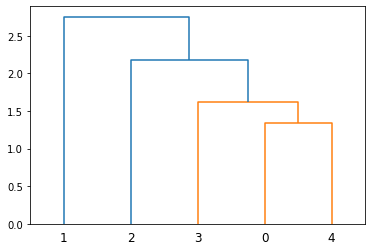

In [36]:
from scipy.cluster.hierarchy import dendrogram #biblioteca para fazer o dendograma
import matplotlib.pyplot as plt #plotar o gráfico
dendrogram(coeficientes_single) #contruir o dendograma utilizando o encadeamento único
plt.show()

Visualização da base de dados com a alocação das observações nos clusters

In [37]:
from scipy.cluster.hierarchy import cut_tree #biblioteca
notas_normalizado_df['Cluster_H'] = cut_tree(coeficientes_single, n_clusters=3)
notas_normalizado_df

,Estudante,Matemática,Física,Química,Cluster_H
0,Gabriela,-1.109685,-0.091938,1.159306,0
1,Luiz Felipe,0.739790,1.938370,-1.261223,1
2,Patricia,1.235991,-0.743170,-0.879034,2
3,Ovidio,0.378917,-0.743170,1.127457,0
4,Leonor,-1.245013,-0.360092,-0.146506,0


Estatísticas descritivas dos clusters por variável

ATENÇÃO: Clusters 2 e 3 têm somente uma observação, não calcula 'sd'

In [38]:
notas_normalizado_df.groupby('Cluster_H').describe()['Matemática'] # Estatísticas descritivas da variável 'matematica'

,count,mean,std,min,25%,50%,75%,max
Cluster_H,,,,,,,,
0,3.0,-0.658594,0.901055,-1.245013,-1.177349,-1.109685,-0.365384,0.378917
1,1.0,0.739790,NaN,0.739790,0.739790,0.739790,0.739790,0.739790
2,1.0,1.235991,NaN,1.235991,1.235991,1.235991,1.235991,1.235991


In [39]:
notas_normalizado_df.groupby('Cluster_H').describe()['Física'] # Estatísticas descritivas da variável 'fisica'

,count,mean,std,min,25%,50%,75%,max
Cluster_H,,,,,,,,
0,3.0,-0.39840,0.327301,-0.74317,-0.551631,-0.360092,-0.226015,-0.091938
1,1.0,1.93837,NaN,1.93837,1.938370,1.938370,1.938370,1.938370
2,1.0,-0.74317,NaN,-0.74317,-0.743170,-0.743170,-0.743170,-0.743170


In [40]:
notas_normalizado_df.groupby('Cluster_H').describe()['Química'] # Estatísticas descritivas da variável 'quimica'

,count,mean,std,min,25%,50%,75%,max
Cluster_H,,,,,,,,
0,3.0,0.713419,0.744887,-0.146506,0.490476,1.127457,1.143382,1.159306
1,1.0,-1.261223,NaN,-1.261223,-1.261223,-1.261223,-1.261223,-1.261223
2,1.0,-0.879034,NaN,-0.879034,-0.879034,-0.879034,-0.879034,-0.879034


Análise de variância de um fator (ANOVA). Interpretação do output:

- Mean Sq do cluster_H: indica a variabilidade entre grupos
- Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
- F value: estatística de teste (Sum Sq do cluster_H / Sum Sq dos Residuals)
- Pr(>F): p-valor da estatística 
- p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

- A variável mais discriminante dos grupos contém maior estatística F (e significativa)

In [41]:
#bibliotecas para análise de variância (ANOVA)
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [42]:
modelo_mat = ols('Matemática ~ Cluster_H', data=notas_normalizado_df).fit() #Matemática
modelo_fis = ols('Física ~ Cluster_H', data=notas_normalizado_df).fit() #Físca
modelo_qui = ols('Química ~ Cluster_H', data=notas_normalizado_df).fit() #Química

aov_mat = sm.stats.anova_lm(modelo_mat)
aov_fis = sm.stats.anova_lm(modelo_fis)
aov_qui = sm.stats.anova_lm(modelo_qui)

print(f'MATEMÁTICA\n{aov_mat}\n\n\nFÍSICA\n{aov_fis}\n\n\nQUÍMICA\n{aov_qui}')

MATEMÁTICA
            df    sum_sq   mean_sq         F    PR(>F)
Cluster_H  1.0  3.223588  3.223588  5.443985  0.101847
Residual   3.0  1.776412  0.592137       NaN       NaN


FÍSICA
            df    sum_sq   mean_sq         F    PR(>F)
Cluster_H  1.0  0.063854  0.063854  0.038808  0.856421
Residual   3.0  4.936146  1.645382       NaN       NaN


QUÍMICA
            df    sum_sq   mean_sq         F    PR(>F)
Cluster_H  1.0  2.848789  2.848789  3.972816  0.140249
Residual   3.0  2.151211  0.717070       NaN       NaN


### Definindo o número de cluster pela altura do salto no dendograma

In [43]:
from scipy.cluster.hierarchy import fcluster

max_d = 1.8 #altura
clusters = fcluster(coeficientes_single,t=max_d, criterion='distance')
df_clust = pd.DataFrame({'Estudante':notas_normalizado_df['Estudante'], 'Cluster':clusters})
df_clust

,Estudante,Cluster
0,Gabriela,1
1,Luiz Felipe,3
2,Patricia,2
3,Ovidio,1
4,Leonor,1


In [44]:
df_clust.groupby('Cluster').count().reset_index() #somatório

,Cluster,Estudante
0,1,3
1,2,1
2,3,1
